# Flight Data Exploration


## Preliminary Wrangling

> This dataset is from Bureau of Transportation Statistics. It tracks the on time performance of domestic flights operated by large air carriers. 

> For this data analysis, we will be looking at data from the years 2000 to 2020.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings

%matplotlib inline

### Loading dataset and saving in dataframe

In [2]:
df = pd.read_csv('airline_2m.csv', encoding='ISO-8859-1')

C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_8172\1800390115.py:1: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airline_2m.csv', encoding='ISO-8859-1')


### Cleaning Data

In [3]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4WheelsOff', 'Div4TailNum', 'Div5Airport', 'Div5AirportID',
       'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime',
       'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum'],
      dtype='object', length=109)

In [5]:
#df.describe()

In [6]:
columns_check = ['Div4WheelsOff', 'Div4TailNum', 'Div5Airport', 'Div5AirportID',
       'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime',
       'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum', 'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
       'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport',
       'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime',
       'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum','FirstDepTime', 'TotalAddGTime', 'LongestAddGTime',
       'DivAirportLandings', 'DivReachedDest', 'DivActualElapsedTime',
       'DivArrDelay', 'DivDistance', 'Div1Airport', 'Div1AirportID', 'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID',
       'Div3WheelsOn', 'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff',
       'Div3TailNum', 'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID',
       'Div4WheelsOn', 'Div4TotalGTime', 'Div4LongestGTime']  
print(df[columns_check].isnull().sum())


Div4WheelsOff           2000000
Div4TailNum             2000000
Div5Airport             2000000
Div5AirportID           2000000
Div5AirportSeqID        2000000
Div5WheelsOn            2000000
Div5TotalGTime          2000000
Div5LongestGTime        2000000
Div5WheelsOff           2000000
Div5TailNum             2000000
Div1AirportSeqID        1998119
Div1WheelsOn            1998119
Div1TotalGTime          1998119
Div1LongestGTime        1998119
Div1WheelsOff           1998488
Div1TailNum             1998486
Div2Airport             1999986
Div2AirportID           1999986
Div2AirportSeqID        1999986
Div2WheelsOn            1999986
Div2TotalGTime          1999986
Div2LongestGTime        1999986
Div2WheelsOff           1999997
Div2TailNum             1999997
Div4TailNum             2000000
Div5Airport             2000000
Div5AirportID           2000000
Div5AirportSeqID        2000000
Div5WheelsOn            2000000
Div5TotalGTime          2000000
Div5LongestGTime        2000000
Div5Whee

In [7]:
df.columns = df.columns.str.strip()


df.drop(columns=['Div4WheelsOff', 'Div4TailNum', 'Div5Airport', 'Div5AirportID',
       'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime',
       'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum', 'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
       'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport',
       'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime',
       'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum','FirstDepTime', 'TotalAddGTime', 'LongestAddGTime',
       'DivAirportLandings', 'DivReachedDest', 'DivActualElapsedTime',
       'DivArrDelay', 'DivDistance', 'Div1Airport', 'Div1AirportID', 'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID',
       'Div3WheelsOn', 'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff',
       'Div3TailNum', 'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID',
       'Div4WheelsOn', 'Div4TotalGTime', 'Div4LongestGTime'],
        inplace=True)

In [8]:
df = df[(df["Year"] >= 2010) & (df["Year"] <= 2020)]

df["Year"].max()

np.int64(2020)

In [9]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierD

In [10]:
df.drop(columns=["Tail_Number"], inplace = True)

### Dataset Structure

The dataset is structured as a CSV file, containing flight information for a three-year period (2010-2020). Each row represents a single flight, and the columns contain various attributes related to that flight. The data encompasses a wide range of information, including flight times (scheduled and actual), delays (arrival and departure), cancellation details (codes and reasons), carrier information, origin and destination airports, and other relevant flight characteristics.

### Main Features of Interest

This investigation focuses on identifying the key factors contributing to flight delays and cancellations.  These features will be used to assess on-time performance and analyze flight characteristics across different destinations and carriers. Specifically, the analysis will examine:

*   **Arrival Delays:** The difference between the scheduled and actual arrival times, measured in minutes.
*   **Departure Delays:** The difference between the scheduled and actual departure times, measured in minutes.
*   **Cancellations:**  Whether a flight was cancelled, indicated by a cancellation code and reason.

### Features Supporting the Investigation

The following dataset features are crucial for investigating the factors influencing arrival and departure delays and cancellations:

*   **Arrival Delay (ArrDelay):**  This feature, measured in minutes, quantifies the extent of arrival delays.
*   **Departure Delay (DepDelay):** This feature, measured in minutes, quantifies the extent of departure delays.
*   **Cancellation Code (CancellationCode):** This code indicates the reason for a flight cancellation (e.g., weather, carrier, national air system).
*   **Cancellation Reason:**  A more descriptive explanation of the cancellation code.
*   **Reporting Airline (Reporting_Airline):**  The code or name of the airline operating the flight.
*   **Origin Airport (Origin):** The airport from which the flight departed.
*   **Destination Airport (Dest):** The airport to which the flight was destined.

By analyzing these features in conjunction, we can identify potential patterns and relationships between delays/cancellations and various factors such as the operating airline, origin/destination airports, and specific cancellation reasons. This analysis will help pinpoint areas for potential improvement in on-time performance.

### Data Analysis Approach

The analysis is structured into two distinct sections:

1.  **Cancellation Analysis:** This section will examine the frequency and causes of flight cancellations, exploring trends across different airlines and contributing factors.
2.  **Delay Analysis:** This section will investigate the extent and primary drivers of flight delays, focusing on arrival and departure delays and their relationship to various flight characteristics.

## Exploring Individual Variables: Univariate Analysis

This section explores the distribution of individual variables within the dataset using univariate analysis techniques.  Each variable is examined in relation to a specific research question, and the resulting visualizations are accompanied by detailed interpretations.

### <font color='blue'> PLOT I 

## what year has the highst flight number


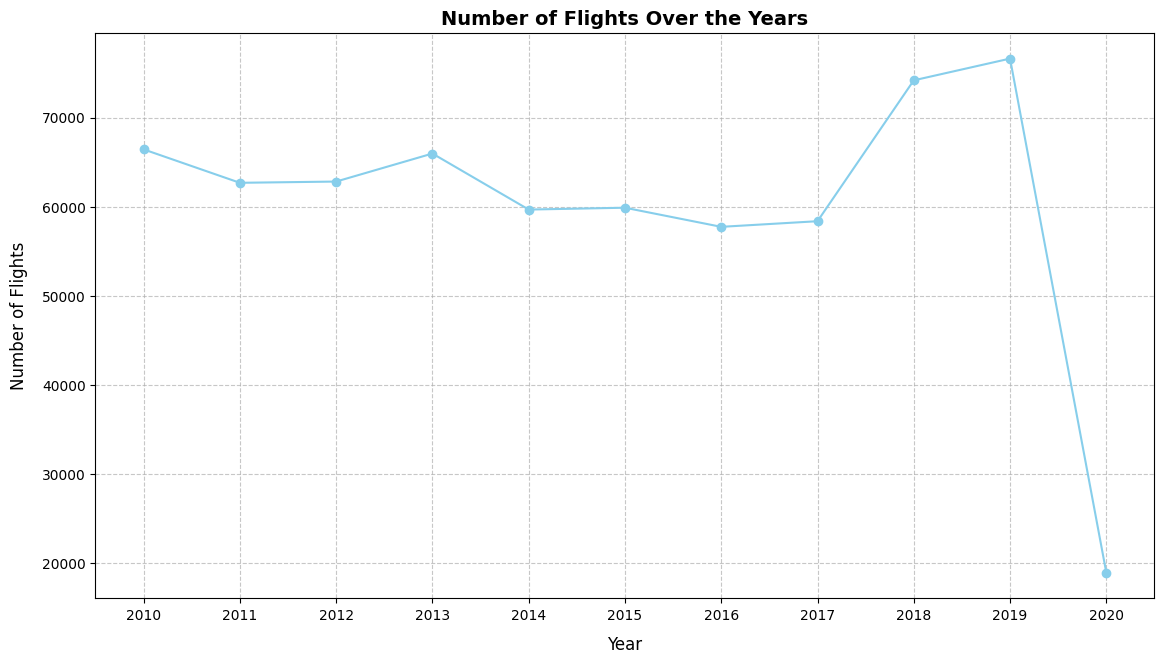

In [11]:
flights_per_year = df['Year'].value_counts().sort_index()  # Sort by year

# Create the line plot
plt.figure(figsize=(12, 7))
plt.plot(flights_per_year.index, flights_per_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Number of Flights', fontsize=12, labelpad=10)
plt.title('Number of Flights Over the Years', fontsize=14, fontweight='bold')

# Improve x-axis ticks (important for all years!)
years = sorted(df['Year'].unique())  # Get the actual years present
plt.xticks(years)  # Set x-axis ticks to show all years

plt.grid(True, linestyle='--', alpha=0.7)  # Add grid
plt.tight_layout(pad=2)
plt.show()

## We can see that 2019 was the highest year to have flights 
## meanwhile it stepped back at 2020 because of corona virus

In [12]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay',

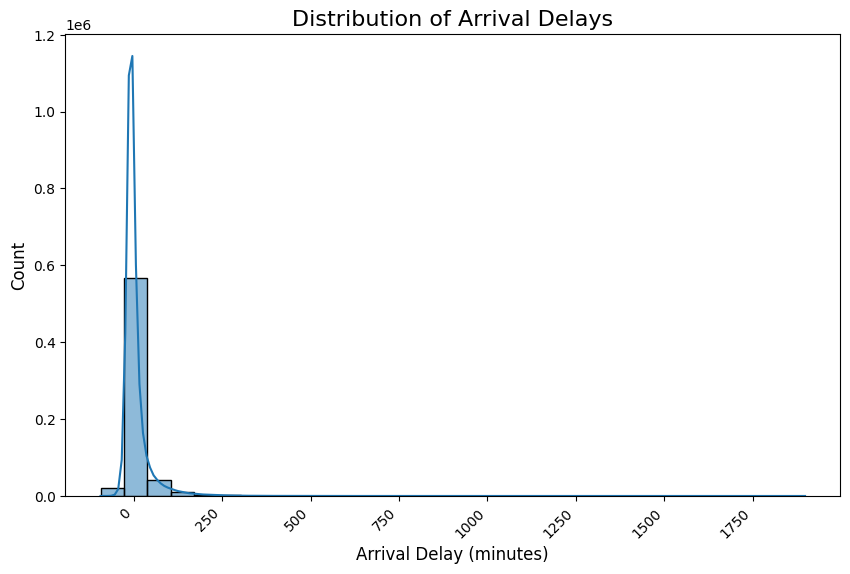

In [13]:

# Create a histogram of ArrDelay
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(df["ArrDelay"], bins=30, kde=True)  # Histogram with Kernel Density Estimate (KDE)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis labels

# Add title and labels
plt.title("Distribution of Arrival Delays", fontsize=16)
plt.xlabel("Arrival Delay (minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.show()


### Distribution of Cancellation Causes

To understand the primary drivers of flight cancellations, we'll first examine the distribution of cancellation causes. This analysis will help us identify the most frequent reasons for cancellations and their relative proportions.


### Which cancellation reason is most common?

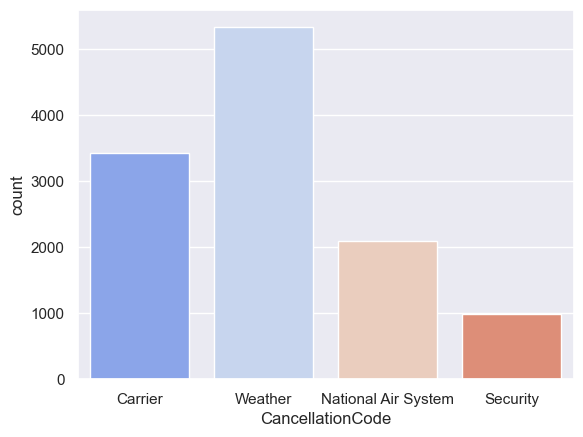

In [14]:
# Set the style to a dark grid background
sns.set(style="darkgrid")

# Choose a new color palette
new_palette = sns.color_palette("coolwarm", 4)

# Define the plot
g = sns.countplot(data=df, x='CancellationCode', hue='CancellationCode', palette=new_palette, order=['A','B','C','D'], legend=False)

# Set fixed ticks
g.set_xticks(range(len(['Carrier', 'Weather', 'National Air System', 'Security'])))

# Update x-tick labels
g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'])

# Hide the warning
warnings.simplefilter("ignore", UserWarning)

# Show the plot
plt.show()


From the graph above, it is clear that **'A' (Carrier) and 'B' (Weather) are the highest reasons for flight cancellations.** 

### <font color='blue'> PLOT II

### Which carrier had the most cancellations?

### Identifying Carriers with High Cancellation Rates

Having explored the main reasons for flight cancellations, we now aim to identify the carriers most affected.  A bar chart of cancellations by carrier code will reveal carrier-specific cancellation rates.

C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_8172\2293649994.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


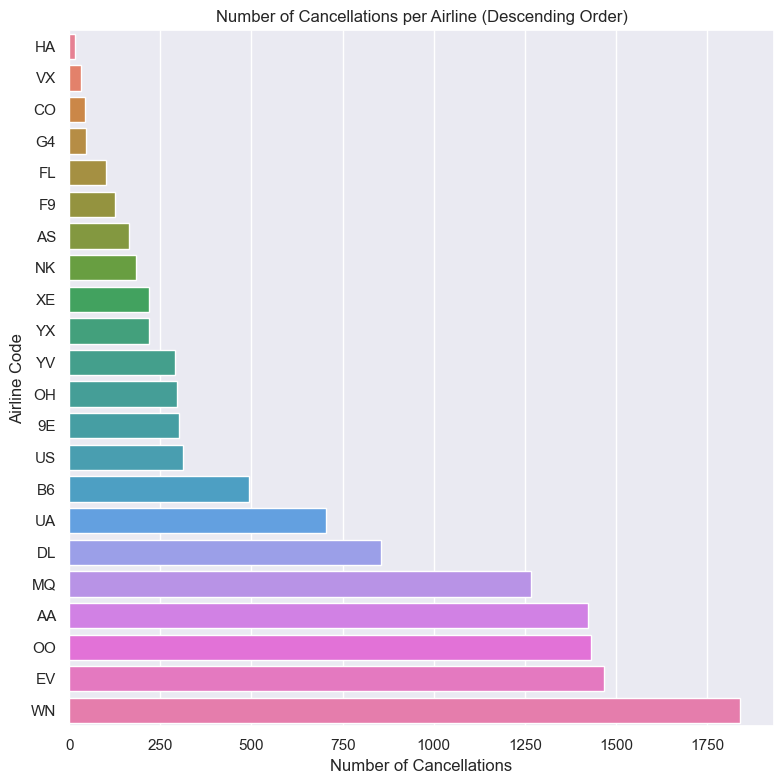

In [15]:
# 1. Filter the DataFrame (Define filtered_flights HERE)
cancellation_reasons = ["A", "B", "C", "D"]
filtered_flights = df.query(f'CancellationCode in {cancellation_reasons}') # df must also be defined

# 2. Count cancellations per airline and sort in descending order
cancellations_per_airline = filtered_flights["Reporting_Airline"].value_counts().sort_values(ascending=True)

# 3. Choose a color palette (get enough colors for all airlines)
num_airlines = len(cancellations_per_airline)
plot_palette = sns.color_palette("husl", n_colors=num_airlines)

# 4. Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# 5. Create the count plot (vertical, descending order)
sns.countplot(
    data=filtered_flights,
    y="Reporting_Airline",
    palette=plot_palette,
    order=cancellations_per_airline.index,
    ax=ax
)

# 6. Set plot labels and title
ax.set_ylabel("Airline Code")
ax.set_xlabel("Number of Cancellations")
ax.set_title("Number of Cancellations per Airline (Descending Order)")

# 7. Improve layout
plt.tight_layout()

# 8. Display the plot
plt.show()

The plot above shows that **WN, EE, OO are the top three carriers with highest cancellations.** These cancellations include all four types (A,B,C,D).

### <font color='blue'> PLOT III

### Which Month of the year had most cancellations?

### Temporal Patterns of Cancellations: Monthly Trends

Shifting our focus to the time factor, we now investigate the monthly trends in flight cancellations 

C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_8172\805580411.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellations_by_month.index, y=cancellations_by_month.values, palette=palette)


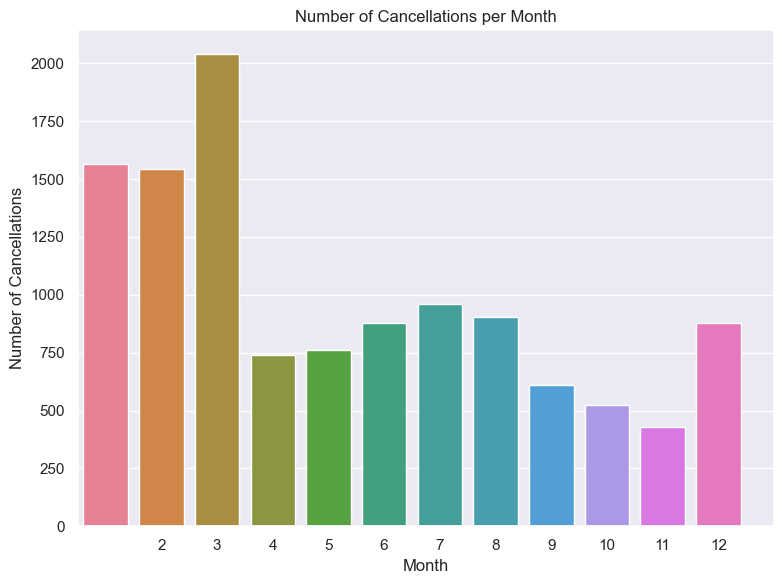

In [16]:

df_sub = df.query('CancellationCode in ["A","B","C","D"]')

# Group by month and count cancellations
cancellations_by_month = df_sub.groupby("Month")["Reporting_Airline"].count().sort_values(ascending=False)

# Create the figure
plt.figure(figsize=(8, 6))

# Generate the correct number of colors
num_months_in_plot = len(cancellations_by_month)
palette = sns.color_palette("husl", n_colors=num_months_in_plot)

# Use sns.barplot for a vertical bar chart
sns.barplot(x=cancellations_by_month.index, y=cancellations_by_month.values, palette=palette)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.title("Number of Cancellations per Month")

# Set x-axis ticks to show all month numbers
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


### Monthly Cancellation Trends: Potential Seasonal Impact

**Analysis:**

*   The visualization reveals a notable trend: the first three months of the year, particularly January and March, experience a higher number of cancellations compared to other months.
*   This pattern suggests a potential seasonal influence on flight cancellations, possibly due to weather conditions prevalent during these months.
*   To further investigate this trend, we'll explore bivariate relationships between cancellations and weather-related factors. This will help determine whether the observed pattern is indeed attributable to seasonal variations or other contributing factors.

**Next Steps:**

*   Conduct a bivariate analysis focusing on weather-related cancellations and their distribution across months.
*   Explore potential correlations between cancellations and specific weather events or conditions.
*   Consider examining regional variations in cancellations to identify any geographical patterns.



### <font color='blue'> PLOT IV 

### What does the distribution of arrival delays look like?

Now, lets take a look at arrival delays by day of the Month.

In [17]:
df_ArrDelay=df[df.ArrDelay.notnull()]

We will plot a violinplot of arrival delays. Since most of the data is concentrated between -100 and 300 we will set the x limits accordingly. 

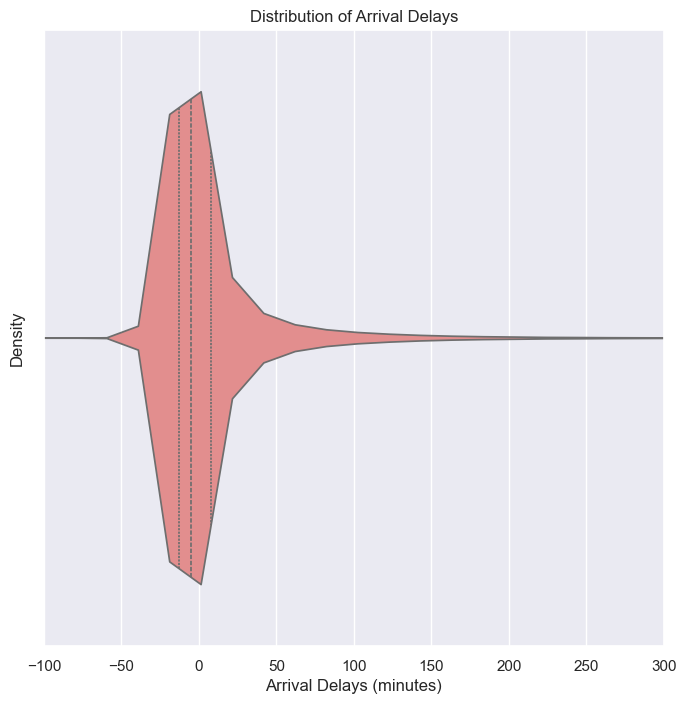

In [18]:
# Define the plot
plt.figure(figsize=(8, 8))

# Violin plot
sns.violinplot(x=df_ArrDelay.ArrDelay, color='lightcoral', inner='quartile')

# Set the limits for the x-axis
plt.xlim(-100, 300)

# Labels and title
plt.xlabel('Arrival Delays (minutes)')
plt.title('Distribution of Arrival Delays')
plt.ylabel("Density")

# Show the plot
plt.show()


From the violinplot we can see that most of the delays are concentrated between 0 and 50 minutes. The distribution is skewed to the right. 

### <font color='blue'> PLOT V 

### What does the distribution of departure delays look like?

Now, lets take a look at the distribution of departure delays. 

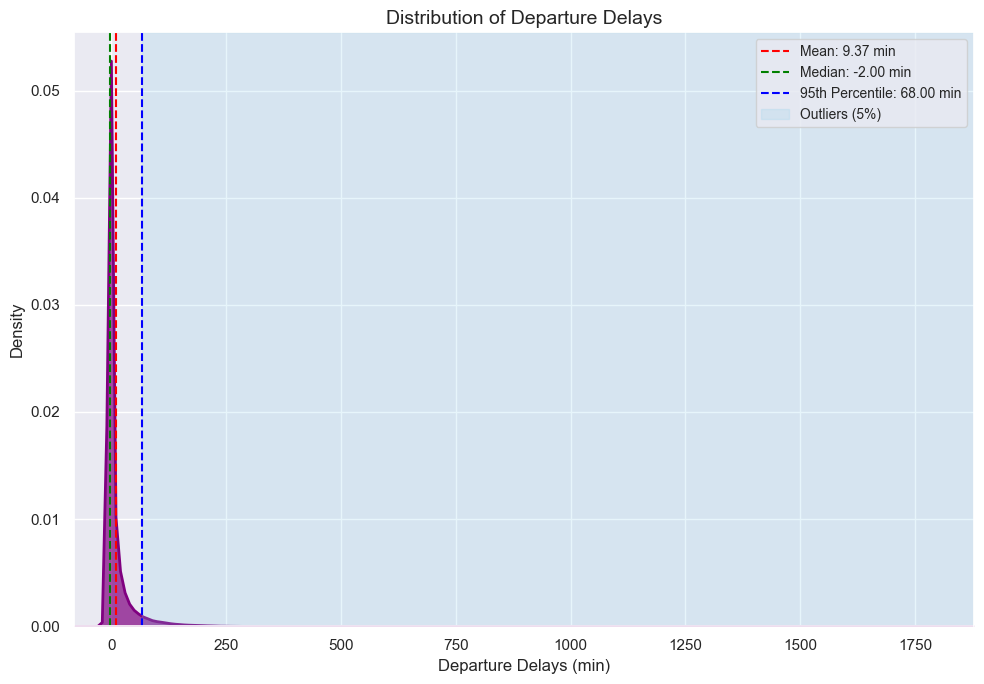

In [19]:
df_DepDelay = df[df.DepDelay.notnull()]

# Option 3: KDE Plot (Extended and Improved)
plt.figure(figsize=(10, 7))  # Larger figure size

sns.kdeplot(df_DepDelay['DepDelay'], fill=True, color='purple', linewidth=2, alpha=0.7)  # Added styling

# Add mean and median lines
mean_delay = df_DepDelay['DepDelay'].mean()
median_delay = df_DepDelay['DepDelay'].median()
plt.axvline(mean_delay, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_delay:.2f} min')
plt.axvline(median_delay, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_delay:.2f} min')

# Add shaded regions for specific percentiles (e.g., 95th percentile)
percentile_95 = df_DepDelay['DepDelay'].quantile(0.95)
plt.axvline(percentile_95, color='blue', linestyle='dashed', linewidth=1.5, label=f'95th Percentile: {percentile_95:.2f} min')

# Shade the region beyond the 95th percentile
plt.axvspan(percentile_95, df_DepDelay['DepDelay'].max(), alpha=0.2, color='skyblue', label='Outliers (5%)')

plt.xlabel("Departure Delays (min)", fontsize=12)  # Increased font size
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Departure Delays", fontsize=14)  # Increased font size

plt.xlim(df_DepDelay['DepDelay'].min(), df_DepDelay['DepDelay'].max()) # Set x-axis limits to the data range
plt.legend(fontsize=10) # Added legend
#plt.grid(True, linestyle='--', alpha=0.5) # Added a subtle grid

plt.tight_layout()
plt.show()

The plot above shows the distribution of departure delays. From the graph, it can be observed that most of the delays are between 0 and 50. The graph is skewed to the right. 

### <font color='blue'> PLOT VI

In [20]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay',

From the plot it can be seen that American Airlines has the highest arrival delays. 

### Summary of Univariate Exploration

The preceding visualizations and analyses explored several key aspects of flight cancellations and delays, including:

*   **Cancellation Causes:**  We examined the distribution of cancellation codes to understand the primary reasons for flight cancellations.  Our analysis revealed that security-related cancellations (code "D") were significantly less frequent compared to other causes (weather, carrier, national air system).

*   **Carrier-Specific Cancellations:**  To identify which carriers experienced the most cancellations, we filtered the dataset to include only flights with cancellation codes (A, B, C, or D). This allowed us to analyze cancellation rates by carrier code, highlighting those carriers with the highest number of cancellations.

*   **Temporal Patterns of Cancellations:**  We investigated the distribution of cancellations across different months to identify potential seasonal trends. This analysis revealed a higher concentration of cancellations during the first three months of the year, particularly in January and March, suggesting a possible link to weather patterns.

*   **Distribution of Delays:**  We explored the distribution of both departure and arrival delays using histograms. Due to the concentration of delay data within a specific range, we applied limits to the x-axis to effectively visualize the distribution and identify any significant trends or outliers.  Missing values (NaN) in the delay data were excluded from these analyses.

This univariate exploration provides a foundation for further investigation into the relationships between these factors and their impact on flight operations.

## Bivariate Exploration

In this section, we will investigate relationships between two variables. 

### <font color='blue'> PLOT I

### What is the relationship between departure and arrival delays?

In [21]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay',

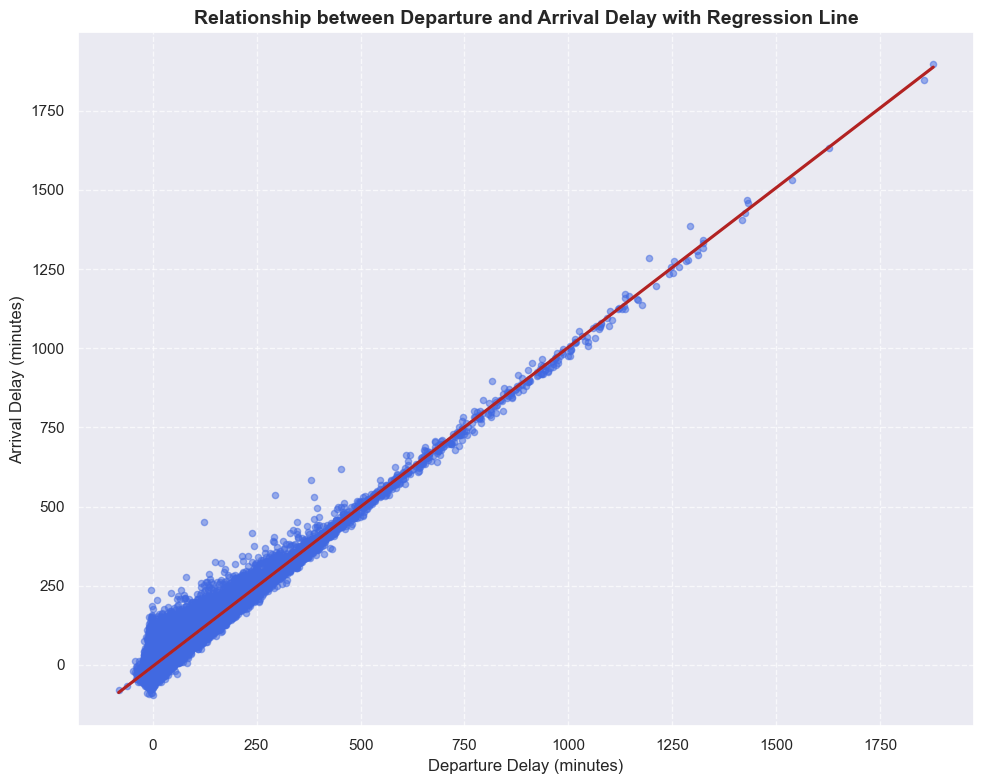

In [22]:
plt.figure(figsize=(10, 8))
sns.regplot(x='DepDelay', y='ArrDelay', data=df, scatter_kws={'alpha':0.5, 's':20, 'color':'royalblue'}, line_kws={'color':'firebrick'}) # Use seaborn's regplot
plt.xlabel('Departure Delay (minutes)', fontsize=12)
plt.ylabel('Arrival Delay (minutes)', fontsize=12)
plt.title('Relationship between Departure and Arrival Delay with Regression Line', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The plot above shows a linear relationship between departure and arrival delays. 

### <font color='blue'> PLOT II

### What is the relationship between departure delay and taxi out time?

C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_8172\3487954473.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dep_delay_bins, y='TaxiOut', data=df, palette='viridis', showfliers=False)


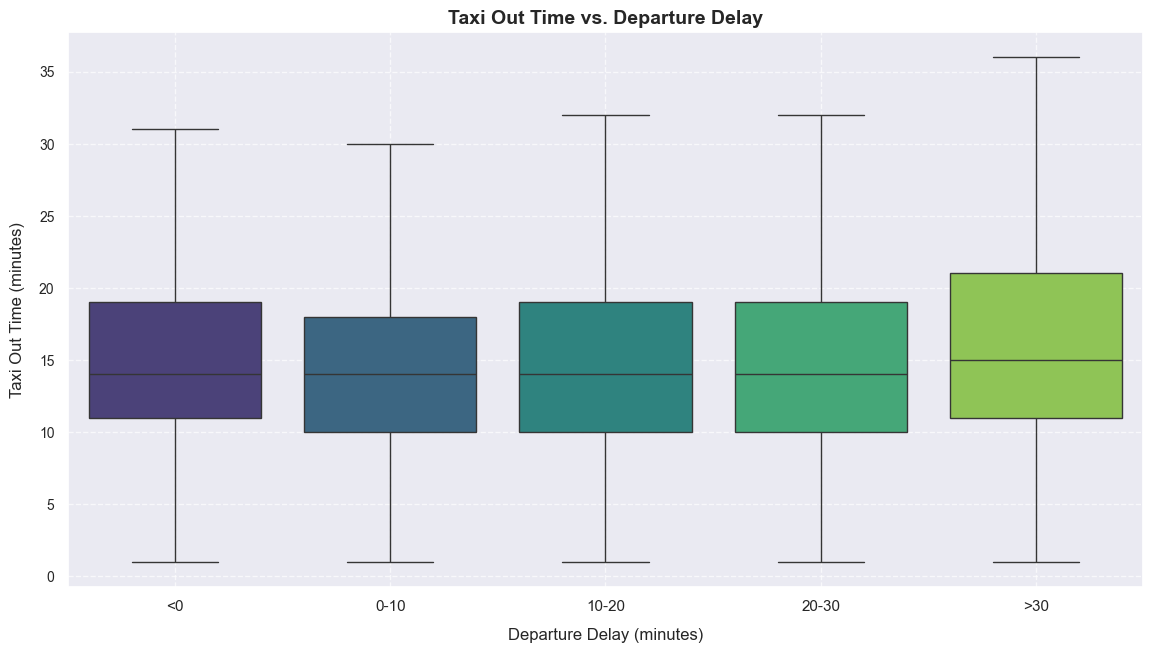

In [23]:
plt.figure(figsize=(12, 7))  # Increased figure size


plt.xlabel('Departure Delay (minutes)', fontsize=12, labelpad=10)
plt.ylabel('Taxi Out Time (minutes)', fontsize=12, labelpad=10)
plt.title('Taxi Out Time vs. Departure Delay', fontsize=14, fontweight='bold')

# Improve x-axis (more readable categories)
# Option 1: If you want to keep DepDelay as continuous but with bins
dep_delay_bins = pd.cut(df['DepDelay'], bins=[-float('inf'), 0, 10, 20, 30, float('inf')], labels=['<0', '0-10', '10-20', '20-30', '>30']) # Example bins
sns.boxplot(x=dep_delay_bins, y='TaxiOut', data=df, palette='viridis', showfliers=False)

# Improve y-axis
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(pad=2)
plt.show()

There is no linear relationship between departure delay and taxi out time. 

### <font color='blue'> PLOT III

### What does each carrier's performance looks like in terms on on time arrivals?

Lets prepare a stacked bar chart that shows each carrier's on time performance. 

**Note:** For on time performance calculations, we will remove all cancelled flights since we only want to gauge flights that took off. 

We will use "arrival_delay" for this calculation. the flights that have arrival_delays>0 were delayed. We will get the proportion of flights (for each carrier) that made it on time. 

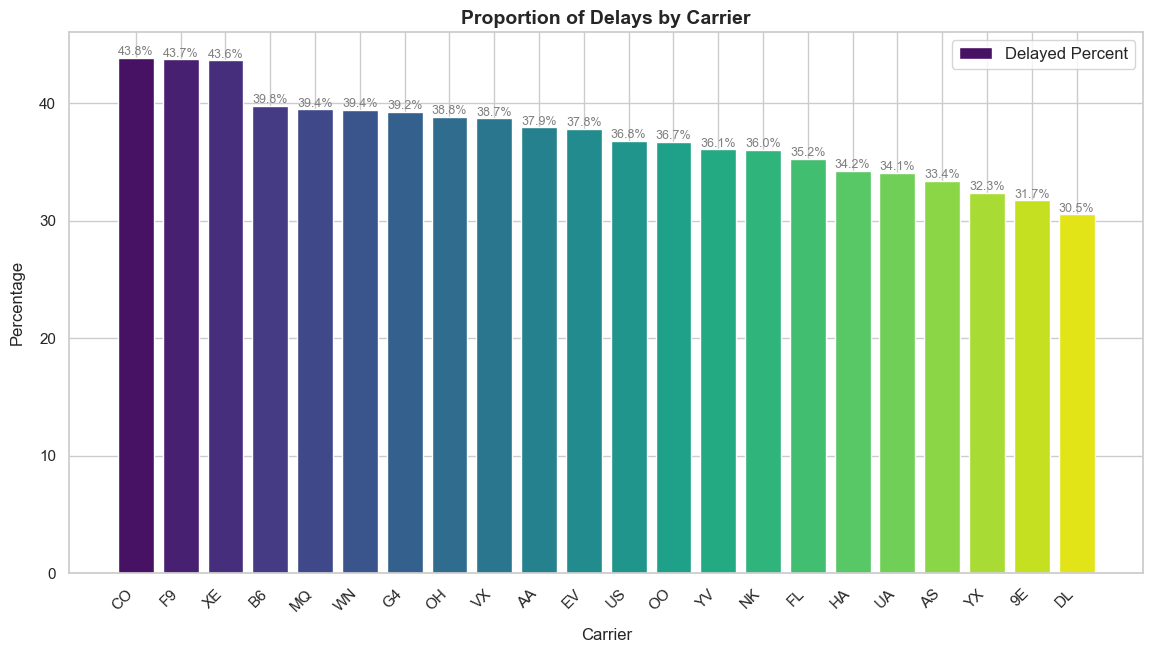

In [24]:
# Prepare the data
arrival_delayed = df.query('Cancelled == 0 and ArrDelay > 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='delayed_flights')
uncancelled_flights = df.query('Cancelled == 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='total_flights')
df_merged_delay = pd.merge(arrival_delayed, uncancelled_flights, on='Reporting_Airline')
df_merged_delay['delayed_percent'] = (df_merged_delay['delayed_flights'] / df_merged_delay['total_flights']) * 100
df_merged_delay['on_time_percent'] = 100 - df_merged_delay['delayed_percent']
df_merged_delay = df_merged_delay.sort_values(by='delayed_percent', ascending=False)

# Prepare the data
arrival_delayed = df.query('Cancelled == 0 and ArrDelay > 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='delayed_flights')
uncancelled_flights = df.query('Cancelled == 0') \
    .groupby('Reporting_Airline') \
    .size() \
    .reset_index(name='total_flights')
df_merged_delay = pd.merge(arrival_delayed, uncancelled_flights, on='Reporting_Airline')
df_merged_delay['delayed_percent'] = (df_merged_delay['delayed_flights'] / df_merged_delay['total_flights']) * 100
df_merged_delay['on_time_percent'] = 100 - df_merged_delay['delayed_percent']
df_merged_delay = df_merged_delay.sort_values(by='delayed_percent', ascending=False)


# Set the style
sns.set_style("whitegrid") 

# Choose a color palette
palette = sns.color_palette("viridis", len(df_merged_delay)) # Or other suitable palette

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))  # Increased size for labels

# Bar plot for delayed percentage
ax.bar(df_merged_delay['Reporting_Airline'], df_merged_delay['delayed_percent'], color=palette, label='Delayed Percent')

# Bar plot for on-time percentage (stacked) - OPTIONAL
# ax.bar(df_merged_delay['Reporting_Airline'], df_merged_delay['on_time_percent'], bottom=df_merged_delay['delayed_percent'], color=palette, label='On-Time Percent')  # Stacked bar

# OR Grouped bar chart
# width = 0.35  # Width of each bar
# x = range(len(df_merged_delay['Reporting_Airline']))
# ax.bar(x, df_merged_delay['delayed_percent'], width, label='Delayed Percent', color=palette[0])
# ax.bar([i + width for i in x], df_merged_delay['on_time_percent'], width, label='On-Time Percent', color=palette[1])
# ax.set_xticks([i + width / 2 for i in x])  # Centered ticks
# ax.set_xticklabels(df_merged_delay['Reporting_Airline'], fontsize=10, rotation=45, ha='right') # Airline names

# Improved Labels and Title
ax.set_xlabel('Carrier', fontsize=12, labelpad=10)
ax.set_ylabel('Percentage', fontsize=12, labelpad=10)
ax.set_title('Proportion of Delays by Carrier', fontsize=14, fontweight='bold')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')  # Rotate for readability

# Add Legend
ax.legend(fontsize=12)

# Add annotations (values on bars)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout(pad=2)
plt.show()



The red bars show delays as a percentage of total flights for each carrier. Larger the red bar, worse the performance.

### <font color='blue'> PLOT IV

### What is the relationship between flight distances and mean arrival delay?

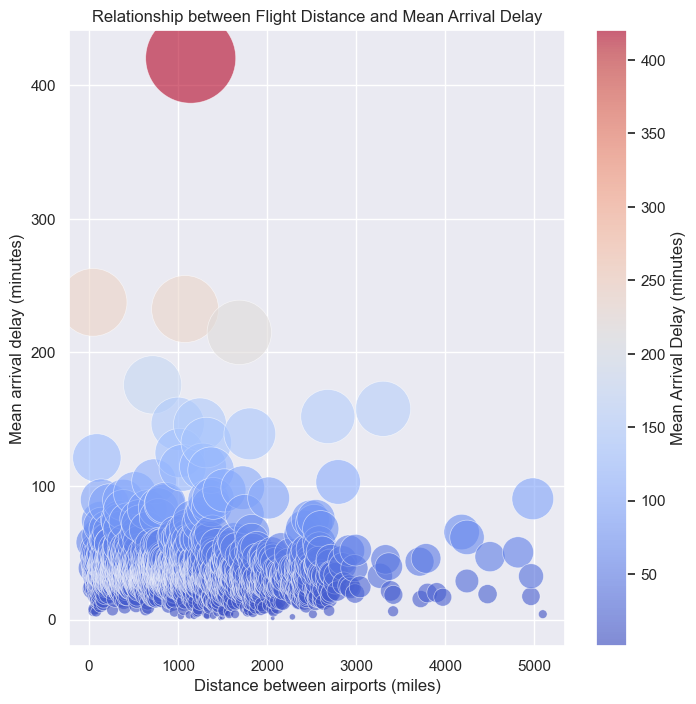

In [25]:
# Define the Pandas series with average arrival delay by distance
distance_arrival = df.query('ArrDelay > 0').groupby('Distance')['ArrDelay'].mean()

# Convert the series for seaborn plotting
x = pd.Series(distance_arrival.index, name='Distance')
y = pd.Series(distance_arrival.values, name='Avg_Arrival_Delay')

# Set the style to a dark grid background
sns.set(style="darkgrid")

# Choose a new color palette
new_palette = sns.color_palette("coolwarm", as_cmap=True)

# Define figure size
plt.figure(figsize=(8, 8))

# Bubble plot with the new color palette
plt.scatter(x=x, y=y, s=y*10, c=y, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)

# Labels and title
plt.xlabel('Distance between airports (miles)')
plt.ylabel('Mean arrival delay (minutes)')
plt.title('Relationship between Flight Distance and Mean Arrival Delay')

# Color bar to show the range
plt.colorbar(label='Mean Arrival Delay (minutes)')

# Show plot
plt.show()


From the graph above, we can see that there is no increasing or decreasing trend in average delay as the distance between airports increases. 

We found a linear relationship between departure and arrival delays. No such relationship was found between departure delay and taxi out time. 


The relationship between departure and arrival delays needs to be further analyzed in mutlivariate exploration. Particularly, we need to see if there is pattern in taxi out time and departure delays due to bad weather conditions and so on. Correlation from the plot cannot definitively imply causation. 

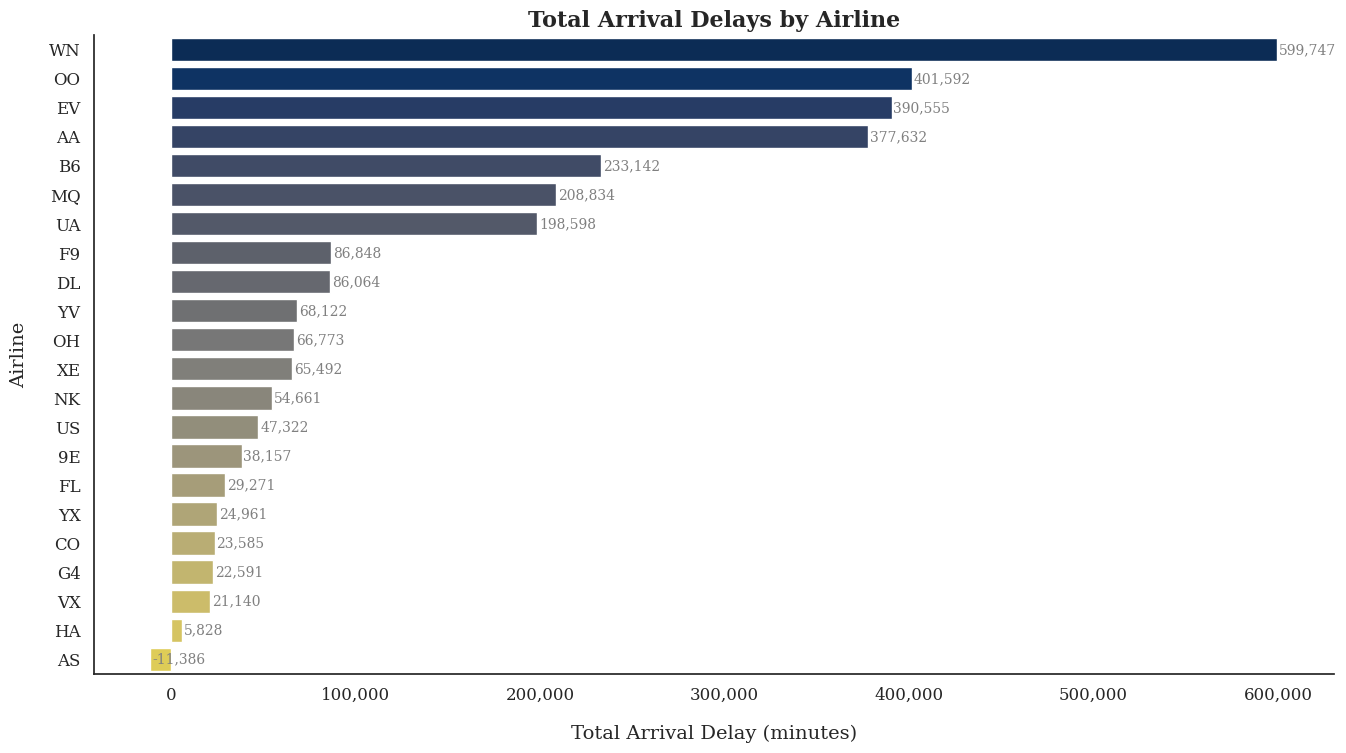

In [26]:
# Define your data (same as before)
df_ArrDelay = df[df.ArrDelay.notnull()]
df_depart_delay = df[df.DepDelay.notnull()]
delays_carrier = df_ArrDelay.groupby('Reporting_Airline').ArrDelay.sum().sort_values(ascending=False)

# Set a professional style
sns.set_style("white")  # Clean white 
plt.rcParams['font.family'] = 'serif' # Use serif font for a more professional look

# Choose a professional color palette (more distinct colors)
palette = sns.color_palette("cividis", len(delays_carrier)) # Or "viridis", "magma"

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8)) # Wider figure for better label spacing

# Horizontal bar plot with improved styling
sns.barplot(y=delays_carrier.index, 
            x=delays_carrier.values, 
            palette=palette, 
            hue=delays_carrier.index,  # Add the hue argument!
            ax=ax,
            legend=False)

# Add thousands separators to x-axis for readability (if needed)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Improved labels and title
ax.set_xlabel("Total Arrival Delay (minutes)", fontsize=14, labelpad=15) # Increased font size, added padding
ax.set_ylabel("Airline", fontsize=14, labelpad=15) # Increased font size, added padding
ax.set_title('Total Arrival Delays by Airline', fontsize=16, fontweight='bold') # Larger, bolder title

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12) # Larger tick labels


# Remove spines (optional - for a cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations (values on bars) - Improved placement and formatting
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:,.0f}", (width + 1000, p.get_y() + p.get_height() / 2),  # Adjust offset as needed
                va='center', ha='left', fontsize=10, color='gray') # Added thousands separator to annotation

# Tight layout and show
plt.tight_layout(pad=2) # Add padding to prevent labels from overlapping
plt.show()

## Multivariate Exploration

In this section, we will continue investigating our variables of interest. This time we will introduce three variables to see if there is a relationship. 

### <font color='blue'> PLOT I

### Cancellation Code by Month: Seasonal Influences

To understand whether certain cancellation reasons are more prevalent during specific times of the year, we'll examine the distribution of cancellation codes across different months. This analysis will help identify any seasonal patterns or trends associated with different cancellation causes.


**Example:**

*   The visualization reveals that weather-related cancellations (code B) are most frequent during the winter months (December-February), consistent with the increased likelihood of snowstorms and other inclement weather conditions.
*   Carrier-related cancellations (code A) show a slight increase during the holiday season (November-December) and the summer months (June-August), potentially due to increased travel demand and operational challenges.
*   NAS-related cancellations (code C) exhibit a relatively stable pattern throughout the year, suggesting less influence from seasonal factors.
*   Further analysis could explore regional variations in these patterns to identify any geographical influences.

**Key Considerations:**

*   **Clear Heading:** Use a descriptive heading like "Cancellation Code by Month: Seasonal Influences" to guide the reader.
*   **Visualization:** Insert your chosen visualization to display the distribution of cancellation codes by month.
*   **Analysis:** Provide a concise and insightful analysis of the visualization, highlighting key findings, seasonal patterns, and any notable trends or differences across cancellation codes.
*   **Regional Variations:** Consider discussing regional differences if your data allows for it.

By following these guidelines, you can effectively present the analysis of cancellation codes by month and provide valuable insights into the potential seasonal influences on different cancellation reasons. Remember to label your visualization clearly and professionally.

C:\Users\MrBENZ\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\MrBENZ\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\MrBENZ\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\MrBENZ\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:85

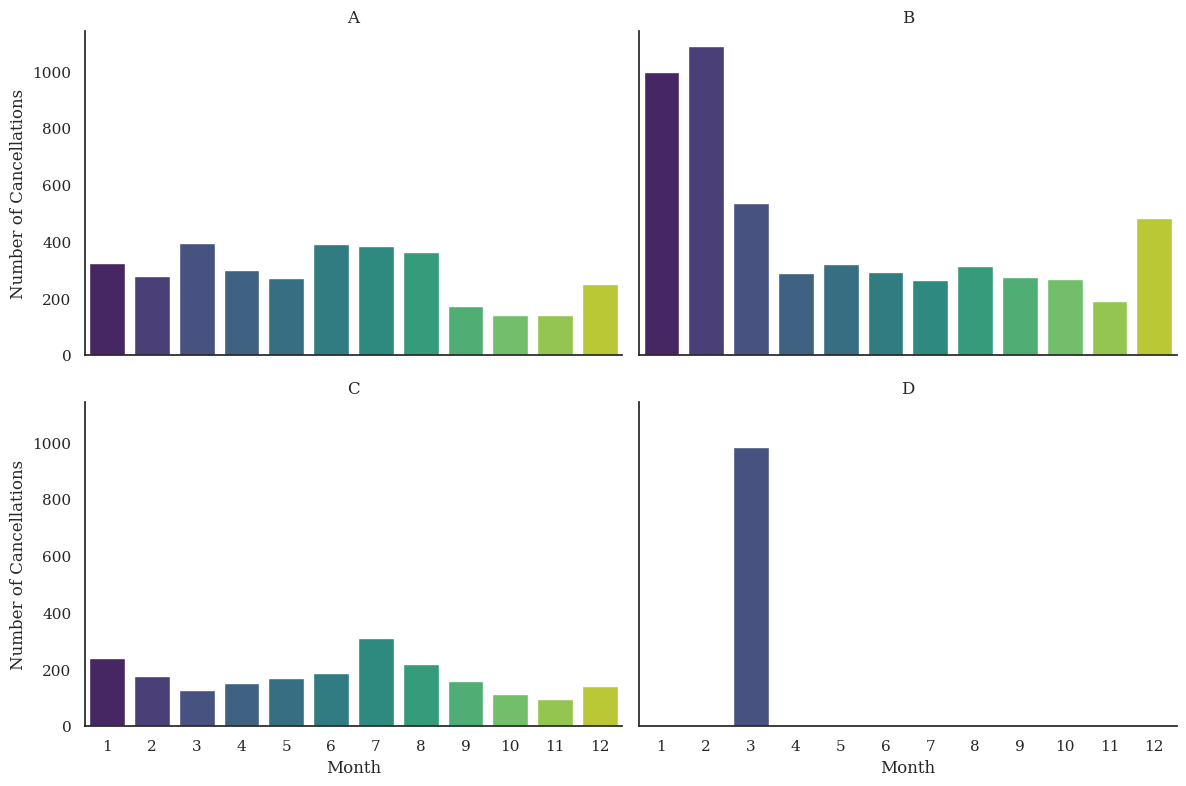

In [27]:
#Define plot
Month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g = sns.FacetGrid(data=df, col='CancellationCode', col_wrap=2, height=4, aspect=1.5) # Wrap columns, adjust size
g.map(sns.countplot, 'Month', order=Month_order, palette='viridis', legend= True) 
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Number of Cancellations") # Set axis labels for all subplots
g.set_xticklabels(Month_order) # Ensure all months are displayed on x-axis
g.tight_layout(pad=1) # Adjust padding
plt.show()
warnings.simplefilter("ignore", UserWarning)

The plot above for "B" shows that the Months of December, January, February and March had most cancellations. This can be due to bad weather (Since "B" is cancellations due to weather) but we will explore more plots on this later. 

### Does the number of flights to destinations have an effect on arrival delays?

C:\Users\MrBENZ\AppData\Local\Temp\ipykernel_8172\3119362625.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Rank 1-50' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  delay_destination.loc[:50, 'top_destinations'] = 'Rank 1-50'


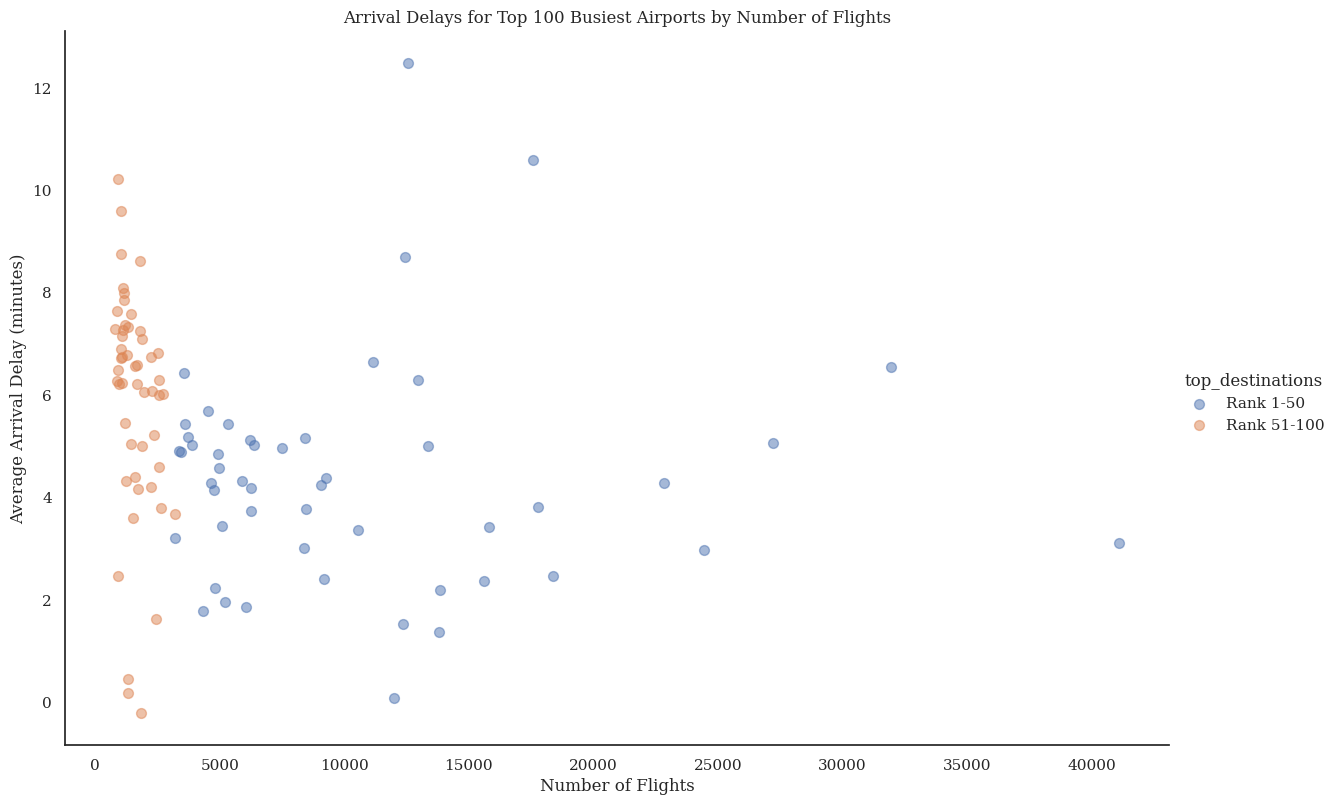

In [28]:


# Grouping by destination: Number of flights & average arrival delay
group_destination = df.groupby('Dest').size().reset_index(name='flights').sort_values('flights', ascending=False)
group_arrival = df.groupby('Dest')['ArrDelay'].mean().reset_index(name='avg_arrival_delay')

# Merge both datasets
delay_destination = pd.merge(group_destination, group_arrival, on='Dest')

# Sorting by busiest destinations
delay_destination = delay_destination.sort_values('flights', ascending=False)

# Feature Engineering: Create 'top_destinations' column
delay_destination['top_destinations'] = np.nan

# Assigning rank categories
delay_destination.loc[:50, 'top_destinations'] = 'Rank 1-50'
delay_destination.loc[50:100, 'top_destinations'] = 'Rank 51-100'

# Define scatter plot with color used for ranking
g = sns.FacetGrid(data=delay_destination, hue='top_destinations', hue_order=['Rank 1-50', 'Rank 51-100'], height=8, aspect=1.5)
g.map(sns.regplot, 'flights', 'avg_arrival_delay', scatter_kws={'alpha': 0.5, 's': 50}, fit_reg=False)
g.add_legend()

# Labels & title
plt.xlabel('Number of Flights')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Arrival Delays for Top 100 Busiest Airports by Number of Flights')

plt.show()


The graph above shows that for the top 50 busiest destinations, the number of flights does have an effect on average arrival delay. This is not so much true for less busy airports that rank from 51-100. 

### <font color='blue'> PLOT II

### What is the trend of each type of delay from Month to Month? Which type of delay contributes the most to flight delays? Is there a lot of variation in any of these? 

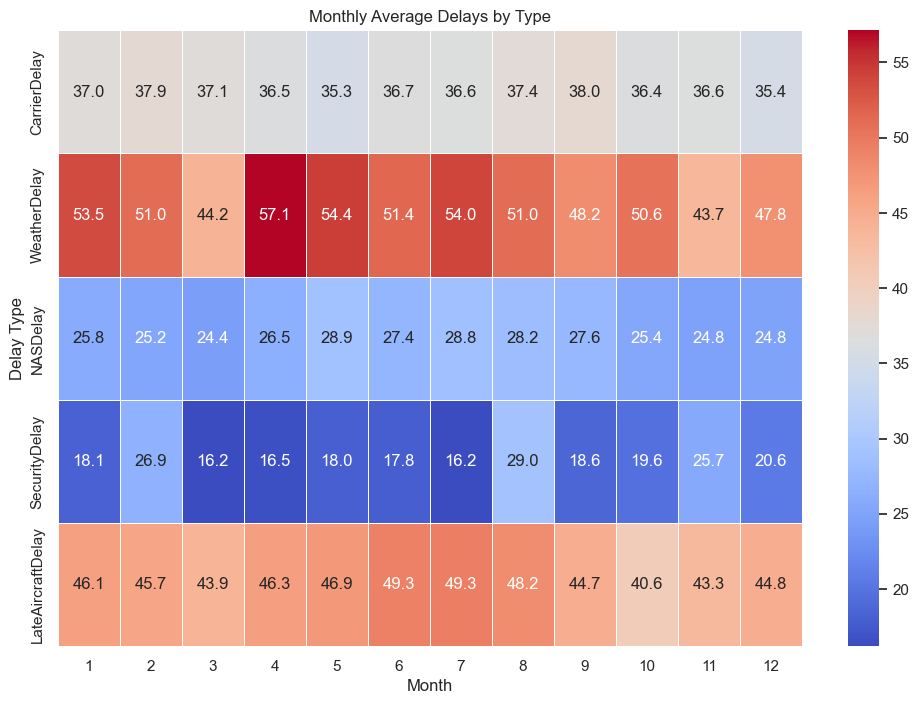

In [29]:
# Prepare the data
carrier_by_Month = df.query('CarrierDelay > 0').groupby('Month')['CarrierDelay'].mean().reset_index()
weather_by_Month = df.query('WeatherDelay > 0').groupby('Month')['WeatherDelay'].mean().reset_index()
nas_by_Month = df.query('NASDelay > 0').groupby('Month')['NASDelay'].mean().reset_index()
security_by_Month = df.query('SecurityDelay > 0').groupby('Month')['SecurityDelay'].mean().reset_index()
lateaircraft_by_Month = df.query('LateAircraftDelay > 0').groupby('Month')['LateAircraftDelay'].mean().reset_index()

# Merge the data
delays_by_Month = (
    carrier_by_Month
    .merge(weather_by_Month, on='Month')
    .merge(nas_by_Month, on='Month')
    .merge(security_by_Month, on='Month')
    .merge(lateaircraft_by_Month, on='Month')
)

# Set the index to Month for better heatmap visualization
delays_by_Month.set_index('Month', inplace=True)

# Define delay types and colors
DelayTypes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Set the style to a dark grid background
sns.set(style="darkgrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(delays_by_Month.transpose(), cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

# Labels and Title
plt.xlabel('Month')
plt.ylabel('Delay Type')
plt.title('Monthly Average Delays by Type')

# Show the plot
plt.show()




Weather and late aircraft related delays were the biggest causes of delays. The weather delay variation can be attributed to changes in weather conditions.

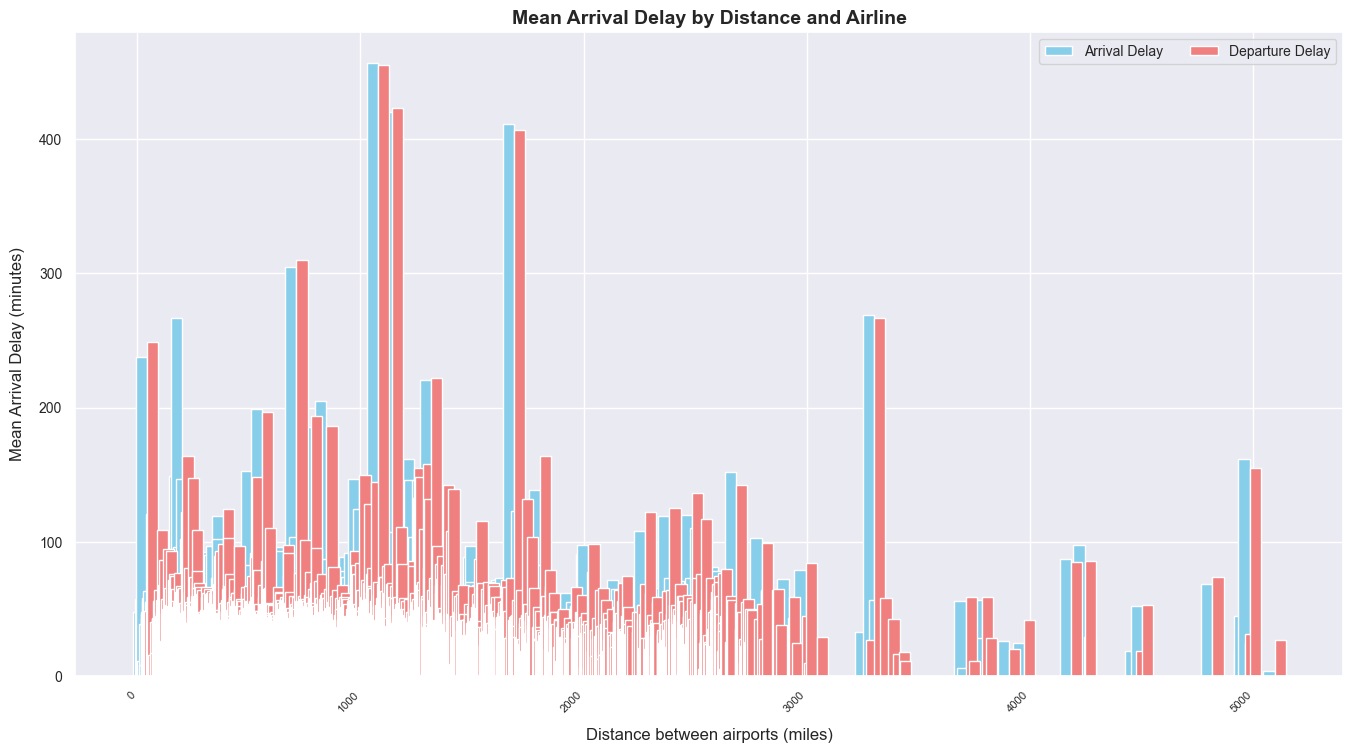

In [30]:
# Calculate average arrival and departure delays by distance
delays_by_distance = df.query('ArrDelay > 0 and DepDelay > 0 and Distance > 0').groupby('Distance').agg({'ArrDelay': 'mean', 'DepDelay': 'mean'})

# Create the clustered bar plot
fig, ax = plt.subplots(figsize=(14, 8))

width = 50  # Adjust width as needed

x = delays_by_distance.index  # Use distance as x-axis

ax.bar(x - width/2, delays_by_distance['ArrDelay'], width, label='Arrival Delay', color='skyblue')
ax.bar(x + width/2, delays_by_distance['DepDelay'], width, label='Departure Delay', color='lightcoral')

# Improved Labels and Title
ax.set_xlabel("Distance between airports (miles)", fontsize=12, labelpad=10)
ax.set_ylabel("Mean Arrival Delay (minutes)", fontsize=12, labelpad=10)
ax.set_title("Mean Arrival Delay by Distance and Airline", fontsize=14, fontweight='bold')

# Improve x-axis ticks and labels (important for long distances!)
ax.tick_params(axis='x', which='major', labelsize=8, rotation=45)  # Rotation only

# Set x-axis tick *label* properties for horizontal alignment
for tick in ax.get_xticklabels():
    tick.set_ha("right")  # or "center", "left" as needed

# Improve y-axis
ax.tick_params(axis='y', which='major', labelsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add Legend
ax.legend(fontsize=10, ncol=3)

plt.tight_layout(pad=2)
plt.show()

This plot visualizes the relationship between flight distance and mean arrival delay, broken down by airline

Multivariate analysis further supports the finding that weather conditions were the top reasons for delays. It can also be seen that longer flights with longer distances experience longer arrival (average) delays than shorter flights. 

In [31]:
!jupyter nbconvert main.ipynb --to html --no-input --no-prompt



[NbConvertApp] Converting notebook main.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1370614 bytes to main.html
